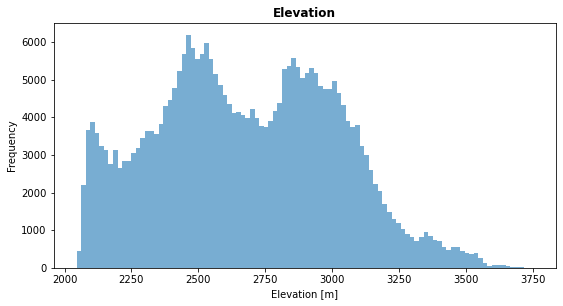

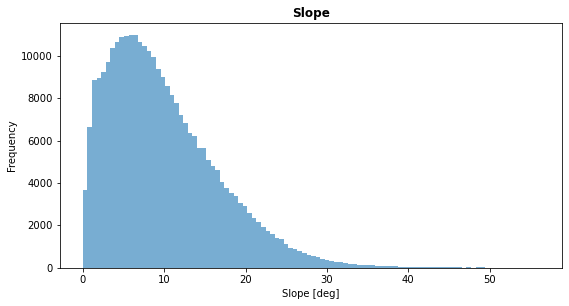

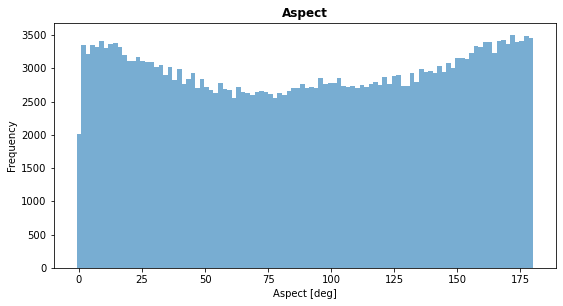

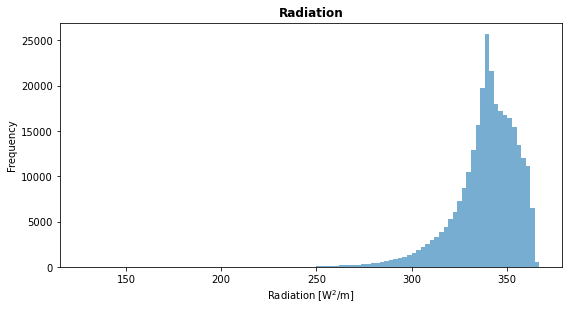

ValueError: autodetected range of [nan, nan] is not finite

In [9]:
#!/usr/bin/env python
# coding: utf-8
"""
Created on Fri Oct 16 09:35:11 2020
@author: hongli
"""

# ### 0. Import libraries ###
import os
import numpy as np
import rasterio as rio
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 

def plot_raster_cdf(raster_file,title,xlabel,ofile):
    num_bins = 100
    # raster and area-based cdf
    with rio.open(raster_file) as ff:
        data = ff.read(1)
        data_mask = ff.read_masks(1)
    counts, bin_edges = np.histogram(data[data_mask!=0], bins=num_bins)

    cum_counts = np.cumsum(counts)
    total_count = cum_counts[-1]
    cdf = cum_counts/float(total_count)

    # Plot comparatives histogram
    fig, ax = plt.subplots(figsize=(9, 9*0.5))
    ax.hist(data[data_mask!=0], bins=num_bins, alpha=0.6)
    
    ax.set_title(title,fontweight='semibold')
    ax.set_xlabel(xlabel) 
    ax.set_ylabel('Frequency')
#     ax.legend(loc='best', framealpha=0.6, facecolor=None)

    plt.show()
    fig.savefig(ofile,dpi=150)    
    return

# --- main script ---
case = 'yampa'
root_dir = '/glade/u/home/hongli/scratch/2020_11_29discretization_error'
case_dir = os.path.join(root_dir, case)

dem_crop = os.path.join(case_dir, 'dem_crop.tif')
slp_crop = os.path.join(case_dir, 'slope_crop.tif')
asp_crop = os.path.join(case_dir, 'aspect_crop.tif')
asp_crop_180 = os.path.join(case_dir, 'aspect_crop_180.tif')
lc_crop = os.path.join(case_dir, 'landcover_crop.tif')
lc_crop_resample = os.path.join(case_dir, 'landcover_crop_resample.tif')
sx_raster = os.path.join(case_dir, 'step7_merge_raw_Sx/sx.tif')
sw_raster = os.path.join(case_dir, 'step9_merge_raw_Sw/sw.tif')

out_dir = os.path.join(case_dir, 'plot/step10_plot_cdf')
if not os.path.exists(out_dir): os.makedirs(out_dir)

ofile = os.path.join(out_dir, 'origin_elevation_hist.png')
plot_raster_cdf(dem_crop,'Elevation','Elevation [m]',ofile)

ofile = os.path.join(out_dir, 'origin_slope_hist.png')
plot_raster_cdf(slp_crop,'Slope','Slope [deg]',ofile)

ofile = os.path.join(out_dir, 'origin_aspect_hist.png')
plot_raster_cdf(asp_crop_180,'Aspect','Aspect [deg]',ofile)

ofile = os.path.join(out_dir, 'origin_sw_hist.png')
plot_raster_cdf(sw_raster,'Radiation','Radiation [W$^2$/m]',ofile)

# ofile = os.path.join(out_dir, 'origin_sx_hist.png')
# plot_raster_cdf(sx_raster,'Maximum upwind angle','Angle [deg]',ofile)

print('Done')